In [1]:
import pandas as pd
import numpy as np
import scipy.fftpack as fft
import matplotlib.pyplot as plt

In [194]:
#Data set
data = pd.read_csv("sunspot_data.csv")
data = data.loc[:,['Year','Number of Sunspots']]
index = data[data['Number of Sunspots'] == -1].index
data.drop(index, inplace = True)
data = data.groupby(['Year']).agg({"Number of Sunspots":"sum"})
data

Number of Sunspots
Year                    
1818               11276
1819                9595
1820                5428
1821                2791
1822                2208
...                  ...
2015               25483
2016               14575
2017                7935
2018                2545
2019                1264

[202 rows x 1 columns]

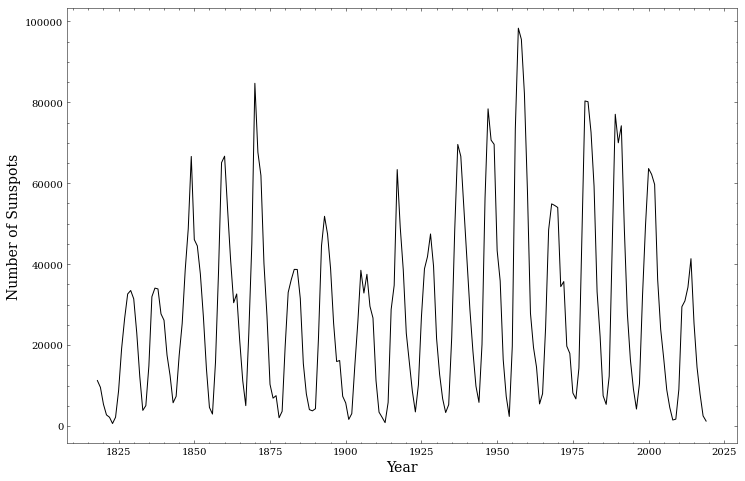

In [193]:
#Sunspots
with plt.style.context(['science', 'no-latex']):
    fig, ax_Signal, = plt.subplots(figsize=(12,8))
    
    ax_Signal.plot(data,color = 'k', linestyle = '-')
    ax_Signal.set_xlabel('Year', fontsize= 14)
    ax_Signal.set_ylabel('Number of Sunspots', fontsize= 14)

plt.savefig('The Sunplots.jpeg')

In [190]:
#FFT
sunspots = data.to_numpy()
power = fft.fft(sunspots)
frequency = fft.fftfreq(len(sunspots), 1)
frequency = frequency[1:]
periods =  1 / frequency

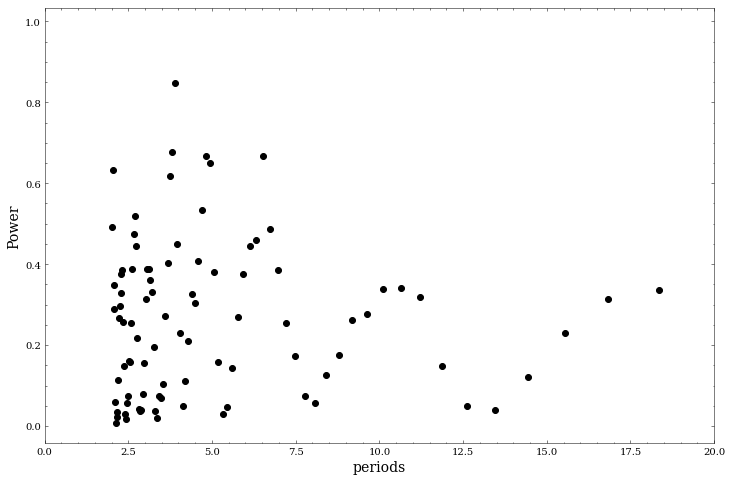

In [191]:
with plt.style.context(['science', 'no-latex']):
    fig, ax_Signal, = plt.subplots(figsize=(12,8))
    
    ax_Signal.scatter(periods,abs(power[1:])*1e-5,color = 'k', linestyle = '-')
    ax_Signal.set_xlabel('periods', fontsize= 14)
    ax_Signal.set_ylabel('Power', fontsize= 14)
    ax_Signal.set_xlim(0,20)

plt.savefig('The Sunplots FFT.jpeg')

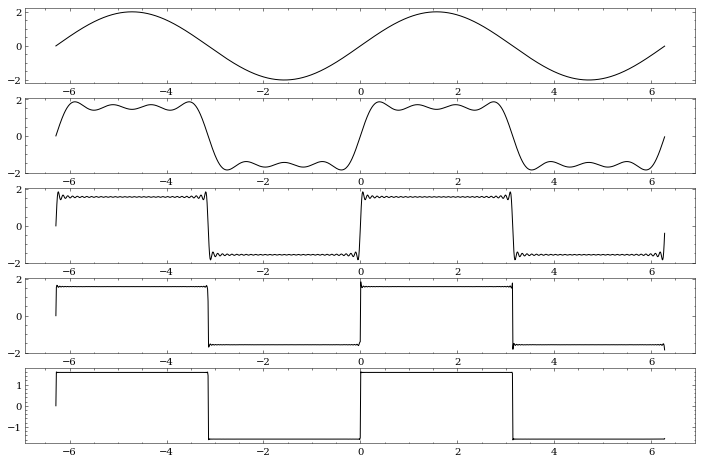

In [195]:
#wave square

def Rec_wave(x, A, n):
    y = np.zeros(len(x))
    for i in range(1, n + 1, 2):
        y += 2 * A * np.sin(i * x ) / i
    return y

the_X = np.arange(-2 * np.pi, 2 * np.pi,0.01)

with plt.style.context(['science', 'no-latex']):
    fig, ax_Signal, = plt.subplots(5,figsize=(12,8))
    for i in range(5):
        ax_Signal[i].plot(the_X,Rec_wave(the_X, 1, 8 ** i),color = 'k', linestyle = '-')

plt.savefig('wave square.jpeg')